# Classification: Logistic Regression

In the previous lesson we talked about linear regression, and, if you remember, it assumes that the response variable Y is a numeric quantity (quantitative). But oftentimes the response variable is a category (qualitative). There are binary and multi-class categorical variabbles. 

<br> The examples of binary variables would be:
* **yes** or **no**
* **0** or **1**
* **negative** or **positive**

<br> The examples of multi-class variables would be:
* **red**, **green**, or **yellow** (e.g. traffic lights)
* **high**, **median**, or **low** (e.g. income)
* hand written digits from **0** to **9** (e.g. when a classifier is trained to destinguish between hand written digits)

First approach we are going to look as is **Logistic Regression** that is, by nature, a binary classifier. <br> But first things first, we start with importing the libraries. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Our data


Today we grow work with a famous **Titanic** dataset. Dependent variable **Survival** is a binary categorical variable with 0 standing for "not survived" and 1 standing for "survived". 

List of Features:

1. **Pclass** is a Ticket class with the following levels:	1 = 1st, 2 = 2nd, 3 = 3rd
2. **Gender** is a binary gender category with the following levels: 'male', 'female'	
3. **Age**, in years	
4. **Sibsp** is a number of siblings / spouses aboard the Titanic	
5. **Parch** is a number of parents / children aboard the Titanic	
6. **Ticket** is a ticket number	
7. **Fare** is a passenger fare	
8. **Cabin** is a cabin number	
9. **Embarked** indicates a port of embarkation	with the following levels: C = Cherbourg, Q = Queenstown, S = Southampton

You not only can download a dataset to your machine and read it from a local directory, but also read a dataset from the [URL](https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv). 

In [2]:
URL = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
data = pd.read_csv(URL)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We have a few identifiers of each passanger: *PassengerId*, *Name*, *Ticket*. Let's keep *PassengerId* only. 

In [3]:
data.drop(['Name', 'Ticket'], axis=1, inplace=True)

What about missing values? How would you explore what's missing and what decisions would you make on those?

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [5]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.drop(['Cabin'], axis=1, inplace=True)

In [7]:
values = {'Age': data['Age'].median()}
data = data.fillna(value=values)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


How can you do better than predicting overall median for *Age*?

In [9]:
# def age_approx(cols):
#     Age = cols[0]
#     Pclass = cols[1]
    
#     if pd.isnull(Age):
#         if Pclass == 1:
#             return data[data['Pclass'] == 1].median()
#         elif Pclass == 2:
#             return data[data['Pclass'] == 2].median()
#         else:
#             return data[data['Pclass'] == 3].median()
#     else:
#         return Age

In [10]:
# data['Age'] = data[['Age', 'Pclass']].apply(age_approx, axis=1)

In [11]:
# data['Age'] = data.apply(age_by_class, axis=1)


In [12]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
data.loc[data['Embarked'].isna(), 'Embarked'] = 'S'

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


Let's do some exploration. What is the oldest passanger in the dataset? What percentage of passangers survivied? What is the mean price of the ticket?

In [15]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Let's visualize it with matplotlib and seaborn.

a) number of passangers - survived and died 

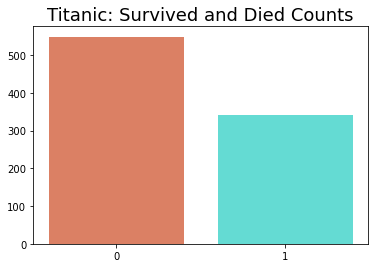

In [16]:
plt.bar(data['Survived'].value_counts().index, data['Survived'].value_counts(), color=['#DB8064', '#64DBD3'])
plt.xticks(ticks=[0,1])
plt.title('Titanic: Survived and Died Counts', loc='center', fontsize=18);

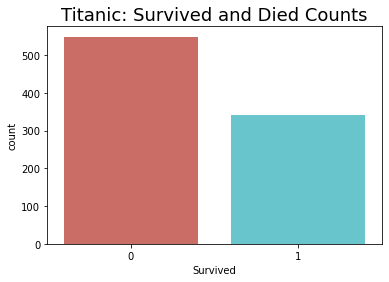

In [17]:
sns.countplot(x='Survived',data=data, palette='hls')
plt.title('Titanic: Survived and Died Counts', loc='center', fontsize=18);

b) histogram of age

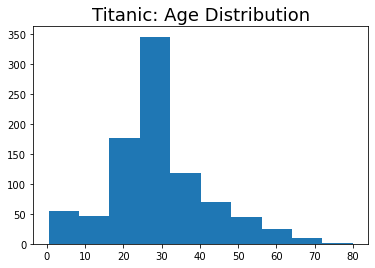

In [18]:
plt.hist(data['Age'])
plt.title('Titanic: Age Distribution', loc='center', fontsize=18);

c) histogram of fare

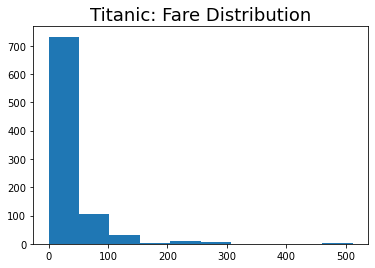

In [19]:
plt.hist(data['Fare'])
plt.title('Titanic: Fare Distribution', loc='center', fontsize=18);

What can you tell abbout these 2 histograms?

Type here

/Users/elena/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


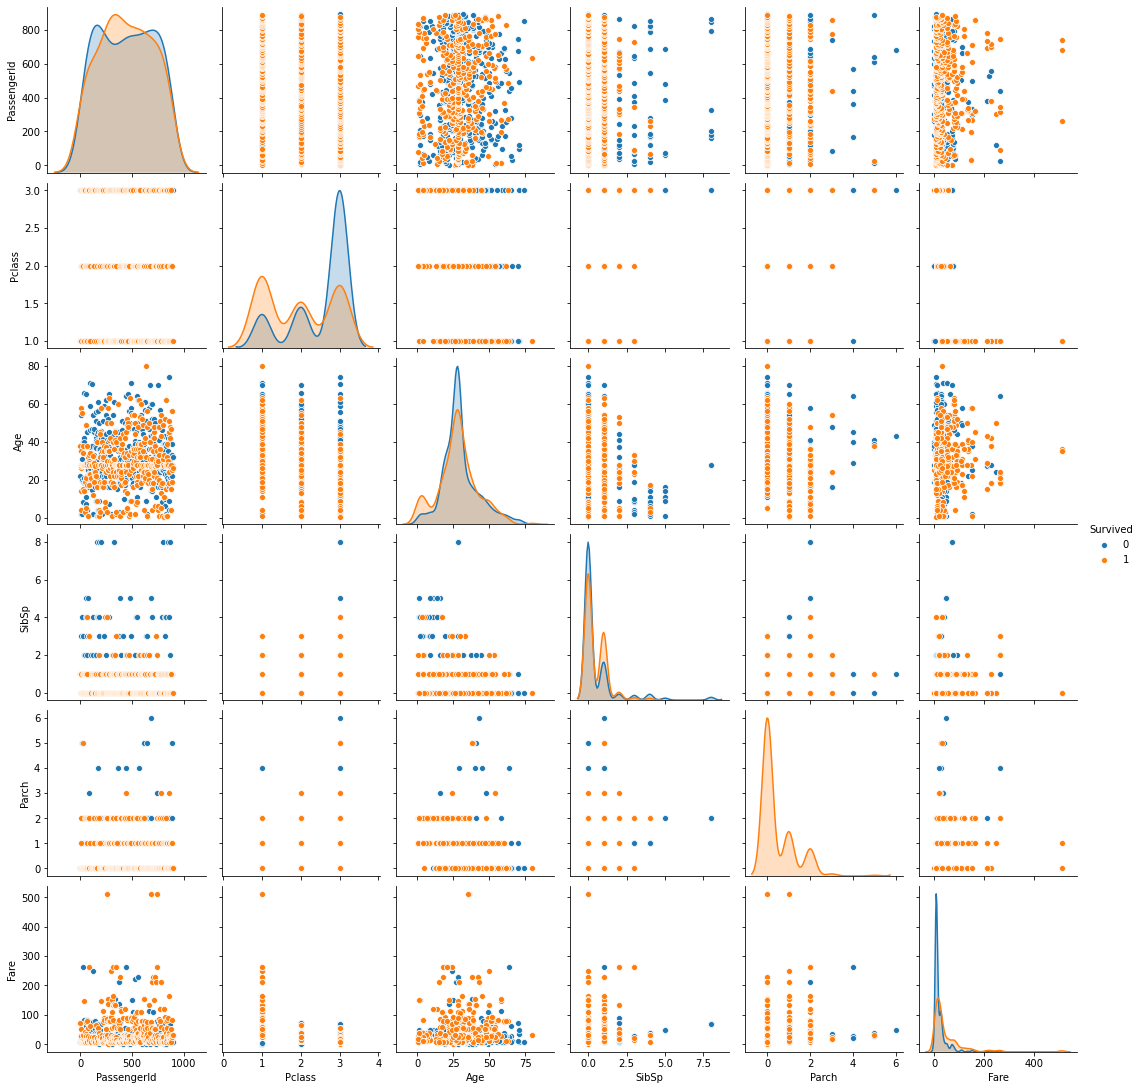

In [20]:
sns.pairplot(data, hue='Survived');

What can you infer from those visualizations?

Let us limit the data to observations with limit below 550,000.

# Train and Test Split

In [21]:
data.shape

(891, 9)

In [22]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [23]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 2:9], data.iloc[:, 1], 
                                                    test_size = 0.3, random_state=22)

Let us see if we have good representation of defaulters and successful payers in both subsets.

In [24]:
y_train.value_counts()/len(y_train)

0    0.617978
1    0.382022
Name: Survived, dtype: float64

In [25]:
y_test.value_counts()/len(y_test)

0    0.61194
1    0.38806
Name: Survived, dtype: float64

What can you say about the representation?

Type here

# Our Modeling Plan:
* Predict if a person survived or not ("hard" classification)
* Determine a probability of a person surviving ("soft" classification). 

*The default of the threshold is 50%, but it really depends on the business context and the problem you are solving. You use the threshold to assign 0 or 1 predictions to observations.* 

* Evaluate the results: was our classifier able to accurately identify those who default and those who did not.

As with linear regression, we are going to start with one predictor and then increase the number of predictors. 

#### a) one predictor

In [26]:
lm1 = LogisticRegression()
lm1.fit(X_train[['Fare']], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
lm1.score(X_train[['Fare']], y_train)

0.6548956661316212

Let's visualize the predictions of this model.

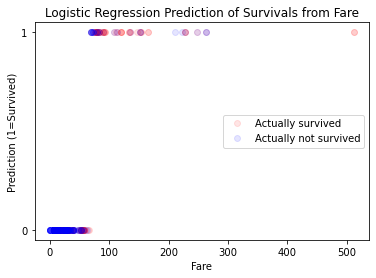

In [28]:
train_df = X_train.copy()
train_df['Survived'] = y_train

# Let's look at what lm1 did
feature = train_df[['Fare']].values
prediction_hard = lm1.predict(feature)

mask = (train_df['Survived'] == 1).values

plt.plot(feature[mask], prediction_hard[mask], 'ro', label='Actually survived', alpha=0.1)
plt.plot(feature[~mask], prediction_hard[~mask], 'bo', label='Actually not survived', alpha=0.1)
plt.ylim(-0.05, 1.05)
plt.yticks(ticks=[0,1])
plt.xlabel('Fare')
plt.ylabel('Prediction (1=Survived)')
plt.title('Logistic Regression Prediction of Survivals from Fare')
plt.legend(loc='center right');

Oh, wow, the model didn't predict any defaults. Even though there definitely are some! Any ideas who to blame? Hold this thought, and let's look at soft probabilities first. 

In [29]:
lm1.predict_proba(feature)[:3,1]

array([0.33586973, 0.69854594, 0.35026325])

Let's visualize probabilities.

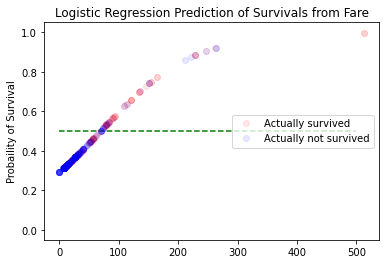

In [30]:
# This is the same model but with proba (returns probabilities instead of class)
prediction_soft = lm1.predict_proba(feature)[:, 1]

plt.plot(feature[mask], prediction_soft[mask], 'ro', label='Actually survived',alpha=0.09)
plt.plot(feature[~mask], prediction_soft[~mask], 'bo', label='Actually not survived',alpha=0.09)
plt.ylim(-0.05, 1.05)
plt.hlines(y=0.5, xmin=0, xmax=500, color='g', linestyle='--')
plt.ylabel('Probaility of Survival')
plt.title('Logistic Regression Prediction of Survivals from Fare')
plt.legend(loc='center right');

Now, let's check the confusion matrix to verify that we do have a problem with the model. There is even no point of checking on the test set... The model itself is bad, even on the data is has seen. 

In [31]:
cm = confusion_matrix(y_train, prediction_hard)
cm

array([[357,  28],
       [187,  51]])

In [32]:
prediction_hard_test = lm1.predict(np.array(X_test['Fare']).reshape(-1,1))

In [33]:
cm_test = confusion_matrix(y_test, prediction_hard_test)
cm_test

array([[156,   8],
       [ 77,  27]])

In the open source community you can find a [nicer way](https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823) of printing out a confusion matrix. Thank you, people, who share code!

In [34]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=18):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    fig = plt.figure(figsize=figsize)

    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

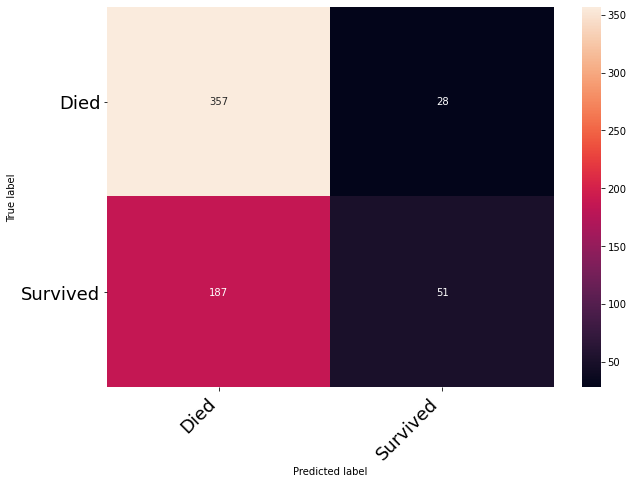

In [35]:
cm1 = print_confusion_matrix(cm, ['Died', 'Survived'])

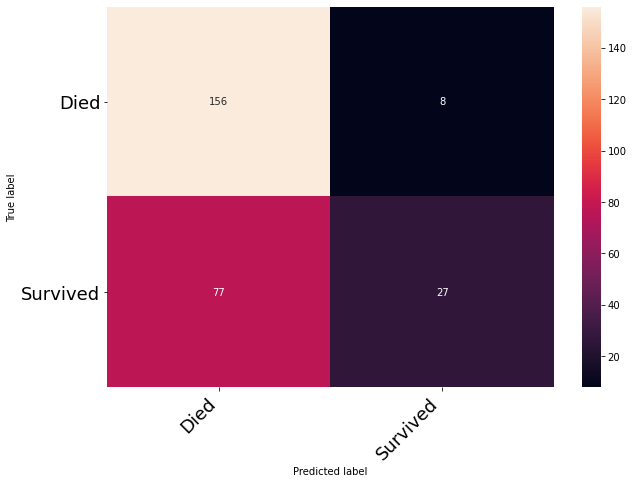

In [36]:
cm1 = print_confusion_matrix(cm_test, ['Died', 'Survived'])

In [37]:
print(classification_report(y_train, prediction_hard))

              precision    recall  f1-score   support

           0       0.66      0.93      0.77       385
           1       0.65      0.21      0.32       238

    accuracy                           0.65       623
   macro avg       0.65      0.57      0.55       623
weighted avg       0.65      0.65      0.60       623



In [38]:
print(classification_report(y_test, prediction_hard_test))

              precision    recall  f1-score   support

           0       0.67      0.95      0.79       164
           1       0.77      0.26      0.39       104

    accuracy                           0.68       268
   macro avg       0.72      0.61      0.59       268
weighted avg       0.71      0.68      0.63       268



Let's interpret coefici..

In [39]:
lm1.coef_, lm1.intercept_

(array([[0.01276381]]), array([-0.87634945]))

The 50% probability is reached when $\beta \cdot \vec{x} = 0$, i.e. when $\beta_1 x_1 + \beta_0 1 = 0$, or when the odds equal 1, so the log odds = 0. Solving this, we have
$$0.0152972*Fare_{switch} - 0.46735112 = 0 \Rightarrow Fare_{switch} = \frac{0.46735112}{0.0152972} \approx 30.6$$
i.e. the threshold is 30.6$. 

In [40]:
np.exp(lm1.coef_)

array([[1.01284562]])

The exponentiated coefficient represents the odds ratio for a 1 dollar increase in fare. That is to say, a 30 dollar ticket will have 1.015 times the odds of survival as 29 dollar ticket. 

#### b) several predictors

In [193]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [201]:
X_train['Sex'] = pd.get_dummies(X_train['Sex'], drop_first=True)
X_train['Sex']

806    1
431    0
430    1
571    0
621    1
      ..
720    0
491    1
48     1
619    1
649    0
Name: Sex, Length: 478, dtype: uint8

In [202]:
lm2 = LogisticRegression()
lm2.fit(X_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [205]:
lm2.score(lm1.predict(feature)

0.8138075313807531

In [206]:
X_test['Sex'] = pd.get_dummies(X_test['Sex'], drop_first=True)
lm2.score(X_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']], y_test)

0.7669902912621359

Let's visualize the predictions of this model.

Now, let's check the confusion matrix to verify that we do have a problem with the model. There is even no point of checking on the test set... The model itself is bad, even on the data is has seen. 

In [208]:
prediction_hard = lm2.predict(X_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']])
cm = confusion_matrix(y_train, prediction_hard)
cm

array([[194,  42],
       [ 47, 195]])

In [211]:
prediction_hard_test = lm2.predict(X_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']])

In [212]:
cm_test = confusion_matrix(y_test, prediction_hard_test)
cm_test

array([[83, 23],
       [25, 75]])

In the open source community you can find a [nicer way](https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823) of printing out a confusion matrix. Thank you, people, who share code!

In [213]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=18):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    fig = plt.figure(figsize=figsize)

    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

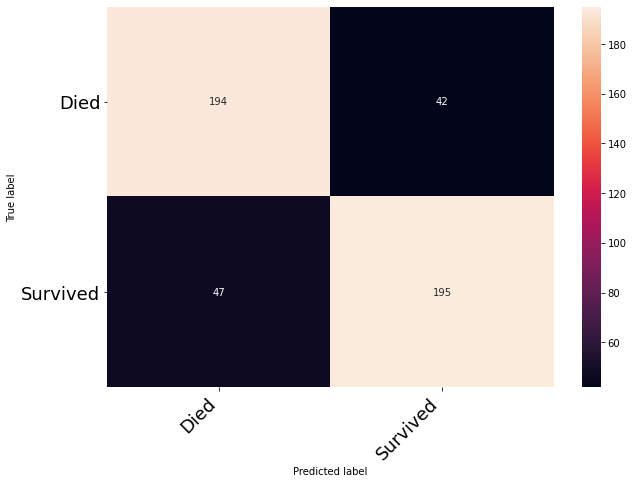

In [214]:
cm1 = print_confusion_matrix(cm, ['Died', 'Survived'])

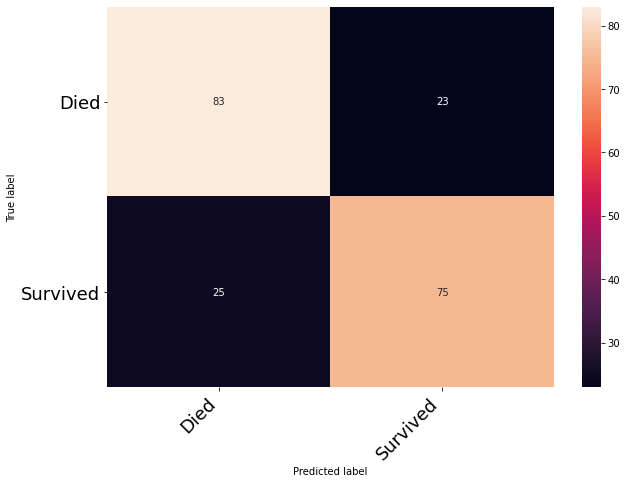

In [215]:
cm1 = print_confusion_matrix(cm_test, ['Died', 'Survived'])

In [216]:
print(classification_report(y_train, prediction_hard))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       236
           1       0.82      0.81      0.81       242

    accuracy                           0.81       478
   macro avg       0.81      0.81      0.81       478
weighted avg       0.81      0.81      0.81       478



In [218]:
print(classification_report(y_test, prediction_hard_test))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78       106
           1       0.77      0.75      0.76       100

    accuracy                           0.77       206
   macro avg       0.77      0.77      0.77       206
weighted avg       0.77      0.77      0.77       206

